In [125]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import sys
import math
import numpy as np
from matplotlib import cm

def set_max_recursion(num):
    sys.setrecursionlimit(num)
    
def get_audio_data(filename):
    data = read(filename)
    rate = data[0]
    audio_data = [rate, []]
    for i in range(0, len(data[1])):
        data_i = data[1][i]
        audio_data[1].append(data_i[0].astype(np.int32))
    return audio_data

def get_audio_data_const(filename):
    data = read(filename)
    rate = data[0]
    audio_data = [rate, []]
    for i in range(0, len(data[1])):
        data_i = data[1][i]
        audio_data[1].append(((data_i.astype(np.int32))))
    return audio_data

def get_max_time(audio_data):
    return len(audio_data[1]) / audio_data[0]

def f(audio_data, t):
    rate = audio_data[0]
    index = int(t * rate)
    return audio_data[1][index]

def fsin2pi(f, audio_data, w, t):
    return f(audio_data, t) * math.sin(2 * math.pi * w * t)

def fcos2pi(f, audio_data, w, t):
    return f(audio_data, t) * math.cos(2 * math.pi * w * t)

def simpson(g, audio_data, a, b, w):
    rate = audio_data[0]
    
    h = 1 / rate
    
    if a + 2 * h > b: return 0
    
    y0 = g(f, audio_data, w, a)
    y1 = g(f, audio_data, w, a + h)
    y2 = g(f, audio_data, w, a + 2 * h)
        
    return h / 3 * (y0 + 4 * y1 + y2) + simpson(g, audio_data, a + 2 * h, b, w)

def get_freq_magnitude(start_time, end_time, audio_data, w):
    sin_val = simpson(fsin2pi, audio_data, start_time, end_time, w)
    cos_val = simpson(fcos2pi, audio_data, start_time, end_time, w)
    return math.sqrt(sin_val**2 + cos_val**2)

def get_table(filename, start_time, end_time, start_w, end_w, step_w):
    audio_data = get_audio_data(filename)
    w = start_w
    while w <= end_w:
        print(w, "Hz:", get_freq_magnitude(start_time, end_time, audio_data, w))
        w += step_w
        
def get_freq_data(audio_data, start_time, end_time, step_t, start_w, end_w, step_w):
    x = []
    group_size_x = 0
    y = []
    group_size_y = int((end_w - start_w) / step_w) + 1
    z = []
    w = start_w
    t = start_time
    while t + step_t <= end_time:
        group_size_x += 1
        while w <= end_w:
            x.append(t+0.5*step_t)
            y.append(w)
            z.append(get_freq_magnitude(t, t+step_t, audio_data, w))
            w += step_w
        t += step_t
        w = start_w
        
    return (group_size_x, group_size_y, x, y, z)

def draw_file(filename, i=0):
    # read audio samples
    input_data = read(filename)
    audio = input_data[1]
    # plot first 100 
    if i == 0:
        plt.plot(audio)
    else:
        plt.plot(audio[:i])
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title  
    plt.title(filename)
    # display the plot
    plt.show()
    
def draw_data(audio_data, i=0):
    # plot first i
    if i == 0:
        plt.plot(audio_data[1], color="green")
    else:
        plt.plot(audio_data[1][:i], color="blue")
    # label the axes
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    # set the title  
    plt.title(filename)
    # display the plot
    plt.show()
    
def draw_freq(freq_data):
    plt.scatter(freq_data[2], freq_data[3], c=freq_data[4], cmap='gray_r', s=800, alpha=0.5)
    plt.ylabel("Frequency")
    plt.xlabel("Time")
    plt.show()

In [88]:
set_max_recursion(1000000)
filename = 'audio/play/play0.wav'
audio_data = get_audio_data(filename)
max_time = get_max_time(audio_data)

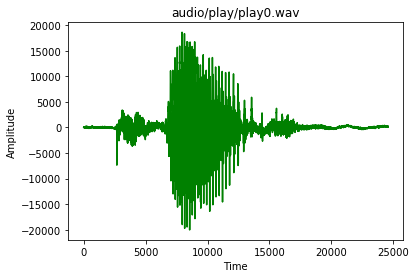

In [89]:
draw_data(audio_data)

In [127]:
freq_data = get_freq_data(audio_data, 0, max_time, max_time*0.1, 20, 2000, 100)

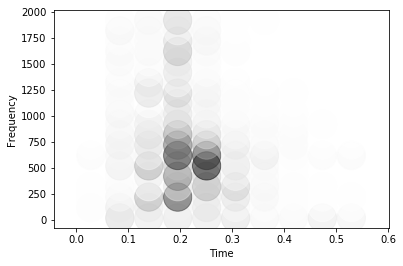

In [128]:
draw_freq(freq_data)

In [129]:
freq_data[0]

10

In [130]:
freq_data[1]

20